<a href="https://colab.research.google.com/github/snehabn/thinkful_challenges1/blob/main/ClusteringChallenge_SN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

!pip install umap-learn
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=53400c9d3f507c808abcca32295b810fef86f46294dbc8bf51ab9703479fd2bd
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=91358b80baef011ba5332b7c71dd2c89b0f19c815c8a0e1ed956444dca54f17a
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


# Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/snehabn/thinkful_challenges1/main/wine-clustering.csv')

print(data.info())
print('Dimensions:', data.shape)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None
Dimensions: (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Cleanup

In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
data.duplicated().sum()

0

##Preprocessing

In [ ]:
ss=StandardScaler()
X = pd.DataFrame(ss.fit_transform(data), columns=data.columns)


### Dimension reduction with PCA

In [ ]:
# You just want the first two principal components
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X)


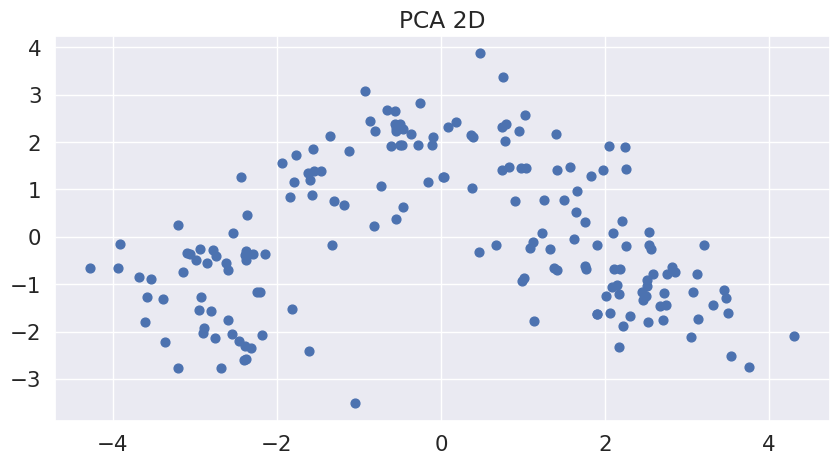

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], s=40)
plt.title('PCA 2D')
plt.axis('on')
plt.show()

Let's next use the Elbow method to determine the best K-value for performing kmeans.

In [ ]:
k_val = list()
sse = list()
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(X)
    k_val.append(i)
    sse.append(kmeans.inertia_)

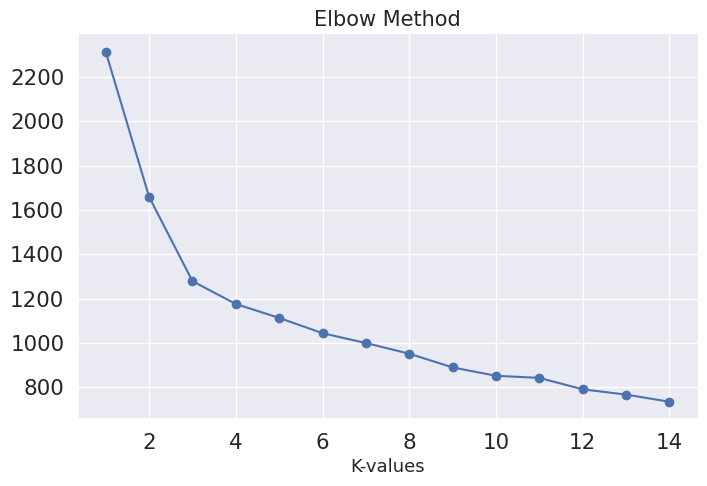

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(k_val, sse)
ax.scatter(k_val, sse, c='b')

ax.set_title('Elbow Method', fontsize=15)
ax.set_xlabel('K-values', fontsize=13)


ax.spines[['top', 'right']].set_visible(False)

plt.show()

Next we'll run the k-means dimension reduction algorithm with n=3 (or classes) since we know from the graph that the 'elbow' point is at 3. This is also confirmed with the data source since there are 3 types of wine.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


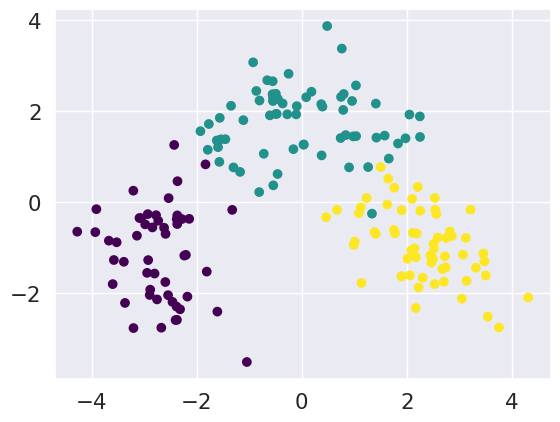

In [ ]:
# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X)
labels = kmeans.labels_

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.show()


Next let's run UMAP for another comparison of dimension reduction.

In [ ]:
umap_results = umap.UMAP().fit_transform(X)

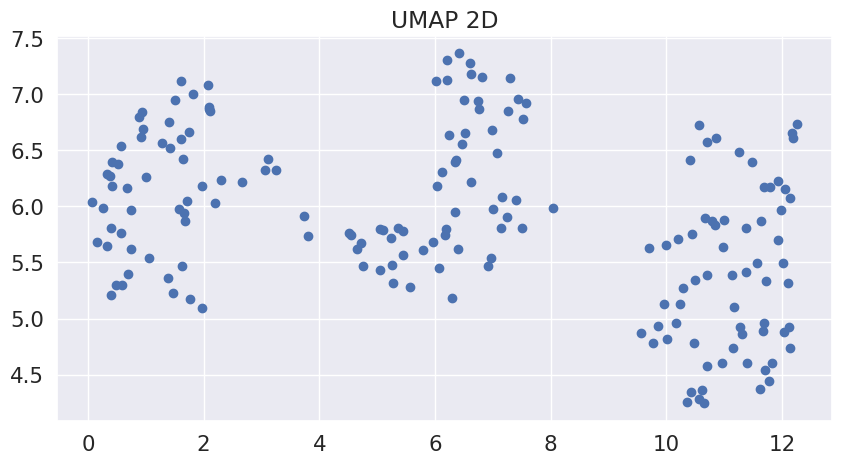

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.title('UMAP 2D')
plt.axis('on')
plt.show()

Based on the dimension reduction performed above we can see that UMAP results in the most distinguishable class separation in this dataset.

Next we'll look at agglomerative clustering.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
types = cluster.fit_predict(X)

y = pd.DataFrame(types)

agg_df = pd.concat([X, y], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
agg_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,0
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,4
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,4
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,4


In [ ]:
from sklearn.metrics import silhouette_score
agg_silhouette_avg = silhouette_score(agg_df, types)
print("Silhouette Score:", agg_silhouette_avg)

Silhouette Score: 0.3514653381003064


This is a weak silhouette score indicating that aggolomerative clustering may not be the best method to determine clustering groups of these wines in the dataset.